# Chocolate-Sales-EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("Chocolate Sales.csv")
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [5]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

In [8]:
for columns in df.columns :
    columns_unique = df[columns].unique()
    print(f"kolom yang unik = {columns_unique}")

kolom yang unik = ['Jehu Rudeforth' 'Van Tuxwell' 'Gigi Bohling' 'Jan Morforth' 'Oby Sorrel'
 'Gunar Cockshoot' 'Brien Boise' 'Rafaelita Blaksland' 'Barr Faughny'
 'Mallorie Waber' 'Karlen McCaffrey' "Marney O'Breen" 'Beverie Moffet'
 'Roddy Speechley' 'Curtice Advani' 'Husein Augar' 'Kaine Padly'
 'Dennison Crosswaite' "Wilone O'Kielt" 'Andria Kimpton' 'Kelci Walkden'
 'Camilla Castle' 'Madelene Upcott' 'Dotty Strutley' 'Ches Bonnell']
kolom yang unik = ['UK' 'India' 'Australia' 'New Zealand' 'USA' 'Canada']
kolom yang unik = ['Mint Chip Choco' '85% Dark Bars' 'Peanut Butter Cubes'
 'Smooth Sliky Salty' '99% Dark & Pure' 'After Nines' '50% Dark Bites'
 'Orange Choco' 'Eclairs' 'Drinking Coco' 'Organic Choco Syrup'
 'Milk Bars' 'Spicy Special Slims' 'Fruit & Nut Bars' 'White Choc'
 'Manuka Honey Choco' 'Almond Choco' 'Raspberry Choco'
 'Choco Coated Almonds' "Baker's Choco Chips" 'Caramel Stuffed Bars'
 '70% Dark Bites']
kolom yang unik = ['04-Jan-22' '01-Aug-22' '07-Jul-22' '27-Apr-22

- Mengubah Tipe kolom 'Date' menjadi datatime

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Date']

0      2022-01-04
1      2022-08-01
2      2022-07-07
3      2022-04-27
4      2022-02-24
          ...    
1089   2022-05-17
1090   2022-06-07
1091   2022-07-26
1092   2022-07-28
1093   2022-05-23
Name: Date, Length: 1094, dtype: datetime64[ns]

- Menghapus tanda '$', ',' dan ' ' pada kolom 'Amount'

In [10]:
df['Amount'] = df['Amount'].str.replace('$', '', regex=False)
df['Amount'] = df['Amount'].str.replace(',', '', regex=False)
df['Amount'] = df['Amount'].str.strip()


- Mengubaha kolom 'Amount' menjadi numerik

In [11]:
df['Amount'] = pd.to_numeric(df['Amount'])

# Exploratory data analysis (EDA)

- Analisa penjulaan berdasarkan negara

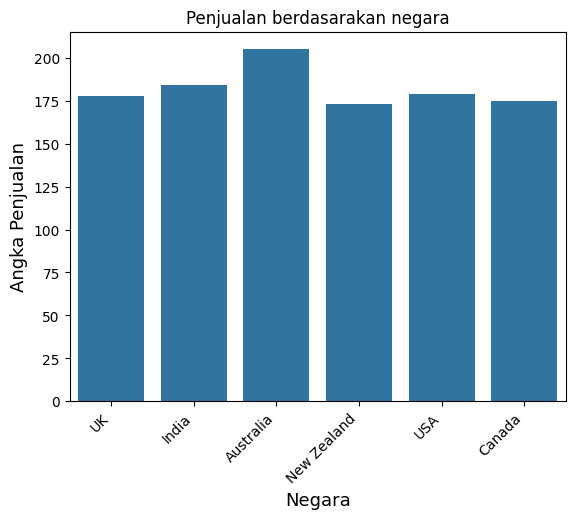

In [12]:
plt.Figure(figsize=(10,7))
sns.countplot(x='Country', data=df)
plt.title('Penjualan berdasarakan negara')
plt.xlabel('Negara', fontsize=13)
plt.ylabel('Angka Penjualan', fontsize=13)
plt.xticks(rotation=45, ha='right')

plt.show()

Pada grafik diatas, dapat dilihat bahwa negara Australia merupakan negara yang yang paling banyak penjualan coklat. India & USA tidak kalah banyak juga peminatnya, kedua negara ini juga sangat suka mengonsumsi coklat.

- Analysis produk paling laris/terjual banyak

In [13]:
Amount_product = df.groupby('Product')['Amount'].sum().reset_index()
top_5_product = Amount_product.sort_values(by='Amount', ascending=False).head(5)

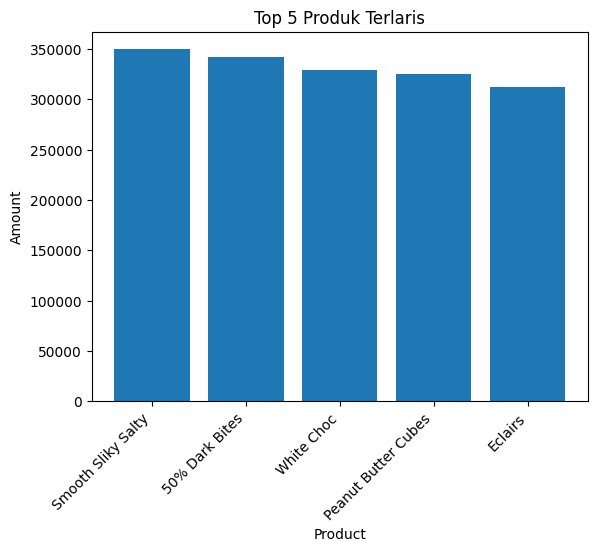

In [14]:
plt.Figure(figsize=(12,6))
plt.bar(x=top_5_product['Product'], height=top_5_product['Amount'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product')
plt.ylabel("Amount")
plt.title("Top 5 Produk Terlaris")

plt.show()

In [15]:
top_5_product

,Product,Amount
19,Smooth Sliky Salty,349692
0,50% Dark Bites,341712
21,White Choc,329147
17,Peanut Butter Cubes,324842
10,Eclairs,312445


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   int64         
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 51.4+ KB


- Outliers

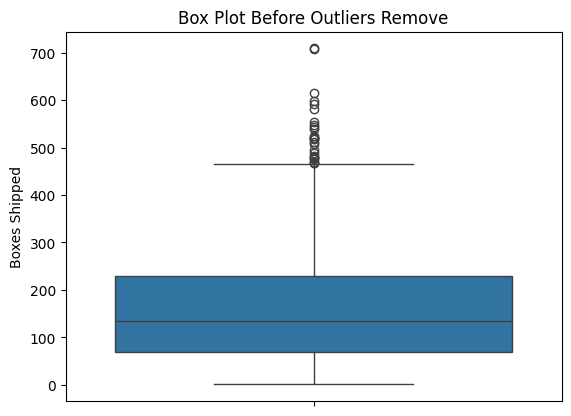

In [17]:
plt.Figure(figsize=(12,6))
sns.boxplot(data=df['Boxes Shipped'])
plt.title('Box Plot Before Outliers Remove')


plt.show()

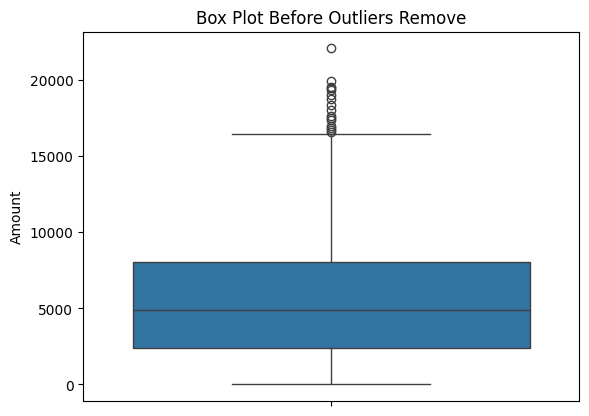

In [18]:
plt.Figure(figsize=(12,6))
sns.boxplot(data=df['Amount'])
plt.title('Box Plot Before Outliers Remove')


plt.show()

- Handling Outliers kolom 'Amount' by Metode Inter Quartile Range - IQR






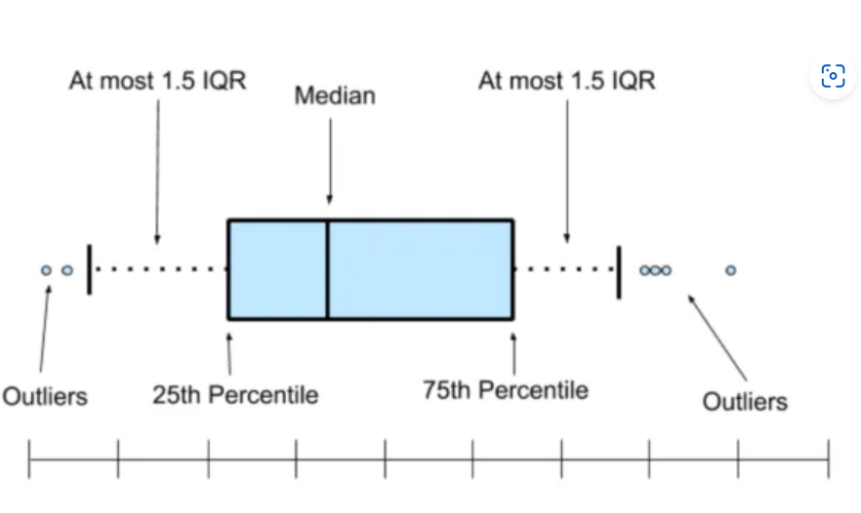

In [19]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
Q1 , Q3

(np.float64(2390.5), np.float64(8027.25))

In [20]:
IQR = Q3 - Q1
IQR

np.float64(5636.75)

In [21]:
lower_limit = Q1 - 1.5*IQR # batas bawah
upper_limit = Q1 + 1.5*IQR # batas atas

In [22]:
# Menampilkan data outliers berdasarkan batas yang telah ditentukan

outliers = df[(df['Amount'] < lower_limit) | (df['Amount'] > upper_limit)]
outliers_cleaning = df[(df['Amount'] > lower_limit ) & (df['Amount'] < upper_limit)]


Text(0.5, 1.0, 'Box Plot After Outliers Remove')

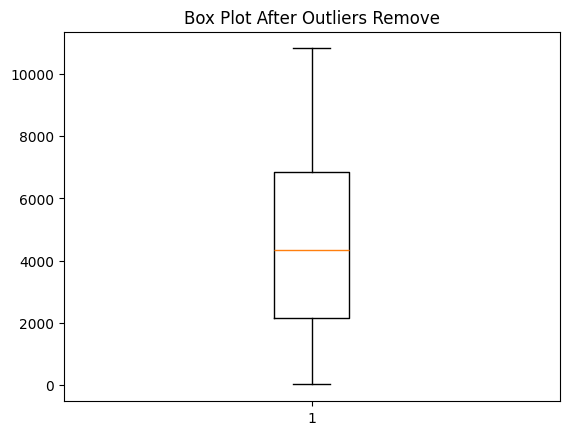

In [23]:
plt.Figure(figsize=(12,6))
plt.boxplot(outliers_cleaning['Amount'])
plt.title('Box Plot After Outliers Remove')

- Handling Outliers kolom "Boxes Shipped" by metode Z-Score


Dengan menggunakan metode ini, outliers dapat didektesi dengan memanfaatkan nilai rata rata dan standar deviasi atau simpangan baku. Rumus dari metode ini adalha :

Cara kerja metode ini adalah, apabila data dapat dikatakan outlirs jika jaraknya kurang dari -3 atau lebih dari 3 kali standar deviasi atau rata ratanya.


Rumus : 


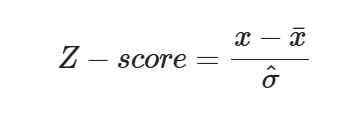


In [24]:
mean = df['Boxes Shipped'].mean()
std = df['Boxes Shipped'].std()

In [25]:
outliers2 = [] # membuat list kosong sebagai wadah  untuk menyimpan data outliers
for data in df['Boxes Shipped']:
    z_score = (data - mean)/std
    if z_score > 3 or z_score < -3 : 
        outliers2.append(data)


In [26]:
# cara dua dalam menemukan outliers pada kolom tertentu dengan menggunakan fungsi

def outliers_detector (df,col) :
    mean = df[col].mean()
    std = df[col].std()

    outliers_3 = []
    for data in df[col] :
        z_score = (data - mean)/std 
        if z_score > 3 or z_score < -3 :
            outliers_3.append(data)
    return outliers_3

In [27]:
outliers = outliers_detector(df,'Boxes Shipped')
outliers

[581, 547, 554, 543, 708, 597, 614, 539, 709, 591]

In [28]:
df_new= df[~df['Boxes Shipped'].isin(outliers)]

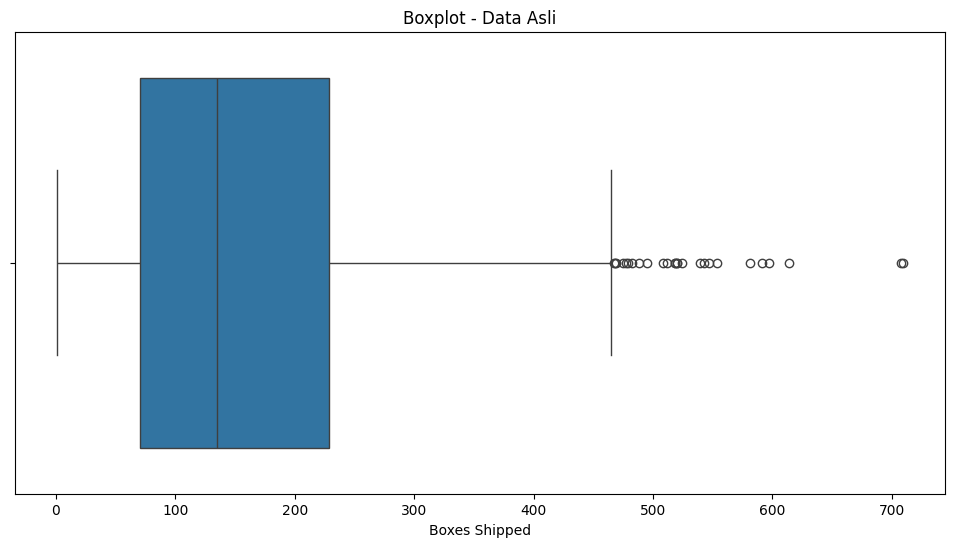

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Boxes Shipped'])
plt.title("Boxplot - Data Asli")
plt.show()

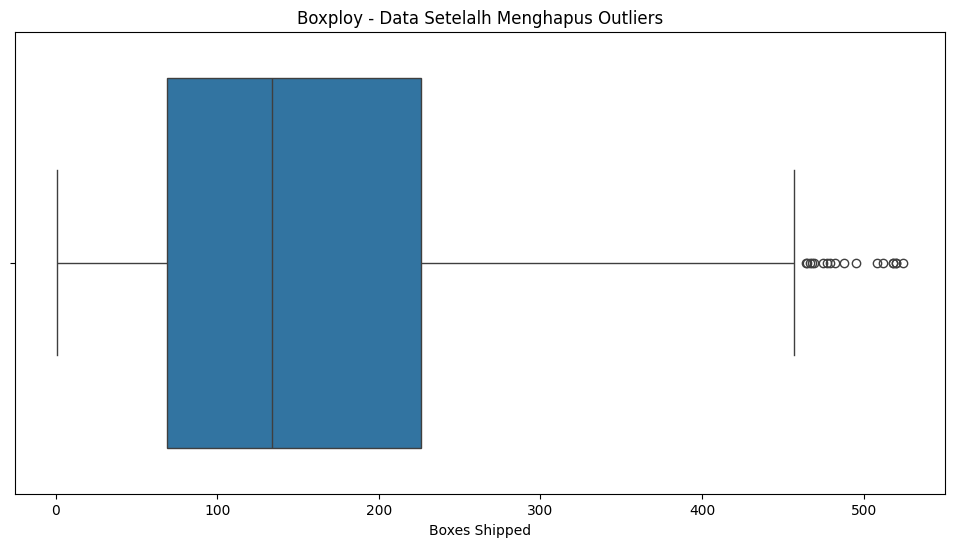

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_new['Boxes Shipped'])
plt.title("Boxploy - Data Setelalh Menghapus Outliers")
plt.show()